<a id='exec-sum'></a>
## EXECUTIVE SUMMARY

### *Predict Rating of Google Play Apps *:

* Project Steps: 
 
    * Pull dataset and icons of images 
  
    * Data Wrangling 
 
    * Data Analysis
    
    * Build Deep Learning Model
    
    * Compare actual rating of apps & predicted rating of apps

#### *Outputs of Project*:

    * Number of Rating,	Genre, Price, Size, Installs, Requires Android, group_by_time(extra feature) is used as a model
      input to predict ratings of google play apps
    
    * Even though icons were analyzed as a matrix form, did not give a valuable information to predict ratings. Thus,
    images were not as a input.
    
    * Constucting deep learning model with two hidden layer. Linear method was selected as a activation function and mean
    square error ('mse') is a loss function of model
    
    * In the training data:
        mse: 0.05718 & mape : 4.2083
    * In the test data:
        mse: 0.1282 & mape : 6.3175

In [5]:
import os
import sys
import pathlib
from pathlib import Path
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import PIL
import random
import matplotlib.image as image
from matplotlib.pyplot import imread

from PIL import Image
from datetime import datetime
from sklearn.utils import shuffle
import scipy.misc
import scipy

import tensorflow as tf

In [2]:
# Configuration file

file_path = r'C:/Users/....' # Please enter the file path of images
csv_data = r'C:/Users/....' # Please enter the location of data.csv

In [3]:
folder = Path(file_path)
os.chdir(folder)
path = os.getcwd()
files = os.listdir(path)
extension = 'webp'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))] 

# Filenames can be updated to create standard global name
filenames_short=[]
for i in range(len(all_filenames)):
    for j in range(len(all_filenames[i])): 
        if all_filenames[i][j] == '_':
            filenames_short.append(all_filenames[i][:j])
            break
        else:
            continue 
# Load an icons
icons = []
for f in range(len(filenames_short)):
    image = Image.open(all_filenames[f])
    image = image.convert('RGB') # Two different modes ,which is RGBA and RGB, are observed in the icons file so all icons is converted to RGB 
    print(image)
    icons.append(image)

<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED455AE50>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED455AD30>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED455ADF0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED455AC40>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED455AE20>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED461BBE0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED461BB50>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED461BA90>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED461BC10>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED461BD00>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED461BCA0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED461BCD0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED461BC40>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED461BD30>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED461BC70>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED4

<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED4632FD0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED75B0B20>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED75B0AF0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED75B0BE0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED75B0550>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED75B0A90>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED75B0C10>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED75B09D0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED75B0A00>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED75B0A30>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED75B0AC0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED75B0BB0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED75B05B0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED75B0B80>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED75B0C40>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED7

C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED75C5FD0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED75C5C10>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC529190>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC5290D0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17ED75C5F10>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC529130>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC529280>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC529040>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC529250>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC529100>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC5292B0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC529310>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC529370>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC529340>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC5291F0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC

<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC53C670>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC53C9A0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC53CA30>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC53CAF0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC53C850>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC53C880>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC53CA60>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC53CA00>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC53CAC0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC53CBB0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC53CBE0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC53CC10>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC53CB50>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC53CA90>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC53CD00>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EDC

<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE145DEE0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE146D610>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE146D460>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE146D4F0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE146D6A0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE146D6D0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE146D340>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE146D5E0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE146D430>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE146D640>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE146D490>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE146D4C0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE146D160>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE146D700>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE146D850>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE1

<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE147DE80>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE147DF70>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE147DFA0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE147DE20>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE148A100>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE148A220>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE148A070>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE148A130>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE148A1F0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE148A310>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE148A340>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE148A2B0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE148A370>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE148A2E0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE148A400>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE1

<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE147D9D0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE148DA30>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE148DA00>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE148DA90>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE148DC70>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE148DBB0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE148DCA0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE148DBE0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE148DD00>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE148DB20>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE148DAC0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE148DD90>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE148DDC0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE148D7F0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE148DCD0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EE1

<PIL.Image.Image image mode=RGB size=360x360 at 0x17EEB2CAF40>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EEB2DA6A0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EEB2DAA30>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EEB2DA940>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EEB2DA880>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EEB2DAAF0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EEB2DAA90>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EEB2DA8B0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EEB2DAAC0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EEB2DAA60>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EEB2DA910>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EEB2DAC40>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EEB2DAC70>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EEB2DACD0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EEB2DAB80>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EEB

<PIL.Image.Image image mode=RGB size=360x360 at 0x17EEB2DEF40>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF60EA6D0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF60EA850>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF60EA8B0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF60EA940>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF60EA820>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF60EA880>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF60EAA00>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF60EA700>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF60EA7C0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF60EAA30>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF60EA910>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF60EAB20>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF60EA9A0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF60EAB80>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF6

<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF60EAFA0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF61086A0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF6108700>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF61085B0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF6108550>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF6108040>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF6108820>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF61087F0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF61088B0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF6108790>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF61087C0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF6108760>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF61088E0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF6108880>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF61086D0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF6

<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF6112FA0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF611E580>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF611E550>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF611E340>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF611E0A0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF611E5B0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF611E700>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF611E760>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF611E670>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF611E730>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF611E640>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF611E5E0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF611E6A0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF611E6D0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF611E880>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EF6

<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF58EE0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF67340>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF672E0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF67490>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF67460>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF673D0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF673A0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF67160>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF67370>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF67520>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF67550>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF670A0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF675B0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF675E0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF674C0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFF

<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF77F40>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF77EB0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF77C70>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF77F10>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF77FD0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF77E80>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF77FA0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF77E20>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF7E040>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF7E190>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF7E1C0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF7E160>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF7E220>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF7E250>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF7E070>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFF

<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF7EF10>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF8ED30>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF8EBB0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF8E940>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF8ECA0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF8ECD0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF8ED00>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF8E850>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF8E910>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF8EBE0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF8ED90>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF8EE80>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF8EC70>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF8ED60>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFF8EE20>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFF

<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFA3DF0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFB3550>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFB36A0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFB3820>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFB35B0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFB3730>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFB3850>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFB3790>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFB37C0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFB36D0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFB3970>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFB38B0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFB39A0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFB3A00>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFB3A60>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFF

<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFC1E80>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFD3370>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFD3520>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFD3580>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFD3550>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFD35E0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFD3400>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFD3670>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFD36D0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFD3730>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFD35B0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFD36A0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFD3460>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFD3640>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFD3700>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFF

<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFDDF40>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFEB280>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFEB340>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFEB040>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFEB1C0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFEB0A0>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFEB310>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFEB460>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFEB190>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFEB370>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFEB430>
<PIL.Image.Image image mode=RGB size=360x360 at 0x17EFFFEB4C0>


In [6]:
folder = Path(file_path)
os.chdir(folder)
path = os.getcwd()
files = os.listdir(path)
extension = 'webp'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))] 

# Load an icons as matrix format
icon_matrix = []
for f in (all_filenames):
    image_matrix = image.imread(f) 
    icon_matrix.append(image_matrix)

In [7]:
image_analysis = []
for i in range (len(icon_matrix)):
    image_analysis.append(np.mean(np.mean(icon_matrix[i],axis=1),axis=1))
print('Processing icons :',np.shape(image_analysis))

Processing icons : (2375, 360)


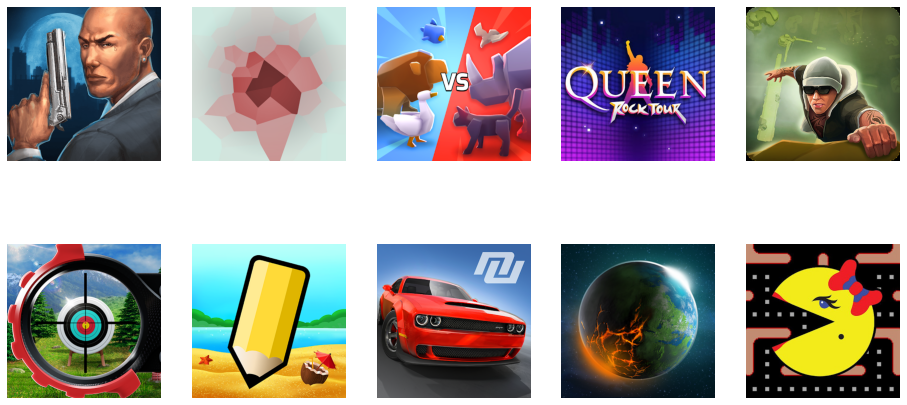

In [8]:
# Samples of icons
plt.figure(figsize = (16,8))
icon_samples = random.sample(range(len(icons)),5)
for i in range (len(icon_samples)):
    plt.subplot(2,5,i+1)
    image = icons[icon_samples[i]]
    plt.imshow(image)
    plt.axis('off')
    plt.subplot(2,5,i+1+5)
    image1 =  icons[icon_samples[i]+8]
    plt.imshow(image1)
    plt.axis('off')

In [9]:
# icons of apps and information of apps are joined on index number. 
image_index_localization = (((pd.concat([pd.DataFrame(filenames_short), pd.DataFrame(image_analysis)],axis=1).T).reset_index()).T).drop(['index'],axis=0)
image_index_localization[0] = image_index_localization[0].astype(int)
image_index_localization

,0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,357,358,359,360
0,0,0.551977,0.559572,0.553535,0.546275,0.546613,0.547702,0.548587,0.599417,0.662206,...,0.555556,0.545526,0.479735,0.432769,0.428742,0.42128,0.415814,0.408513,0.406558,0.408202
1,1000,0.613711,0.614194,0.614743,0.615255,0.615705,0.616242,0.616656,0.617183,0.617778,...,0.402876,0.402832,0.401572,0.394118,0.378512,0.371006,0.369401,0.367306,0.364957,0.361395
2,1001,0.332552,0.332719,0.332951,0.333129,0.333267,0.333409,0.333511,0.333638,0.333707,...,0.571553,0.578783,0.583354,0.594099,0.603169,0.603732,0.602781,0.60196,0.600922,0.600192
3,1002,0.653037,0.667026,0.665635,0.665412,0.66521,0.66493,0.664676,0.664418,0.66423,...,0.649061,0.648977,0.648789,0.648617,0.648571,0.648465,0.64838,0.648288,0.650175,0.63968
4,1003,0.359531,0.36701,0.372701,0.378562,0.382138,0.385689,0.388704,0.391498,0.391972,...,0.252985,0.251307,0.249695,0.247576,0.24533,0.243467,0.241147,0.237898,0.234129,0.22705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370,997,0.609981,0.610315,0.610319,0.604531,0.599422,0.591053,0.580283,0.573373,0.578442,...,0.375422,0.387695,0.397568,0.412361,0.423174,0.435335,0.444412,0.452078,0.45885,0.466286
2371,998,0.595926,0.579714,0.5824,0.584038,0.585483,0.587026,0.588486,0.59101,0.592528,...,0.577254,0.587334,0.599655,0.615384,0.626895,0.649368,0.667007,0.670544,0.671423,0.667915
2372,999,0.371261,0.339997,0.3693,0.380327,0.388399,0.392342,0.394775,0.40195,0.408838,...,0.352574,0.339219,0.32675,0.306924,0.29126,0.268917,0.247069,0.219985,0.175642,0.153377
2373,99,0.0,0.0,0.510191,0.677757,0.692827,0.700706,0.715436,0.736313,0.745817,...,0.547619,0.547252,0.550628,0.548913,0.539477,0.503976,0.0,0.0,0.0,0.0


In [10]:
dataset = pd.read_csv(csv_data )
dataset

,ID,Name,Number of Rating,Genre,Rating,Price,Description,Updated,Size,Installs,Current Version,Requires Android,Content Rating,Offered By,Interactive Elements,In-app Products
0,0,Geometry Dash Lite,"7,227,039",Arcade,4.4,0,Jump and fly your way through danger in this r...,11-Dec-19,58M,"100,000,000+",2.2,4.0 and up,Everyone,RobTop Games,NaN,NaN
1,1,Fastlane: Road to Revenge,"621,784",Action,4.6,0,THEY TOOK YOUR CITY. THEY SHOULD’VE TAKEN YOUR...,16-Aug-21,92M,"10,000,000+",1.48.0.260,4.4 and up,"Everyone,Mild Fantasy Violence",Space Ape,Digital Purchases,$0.99 - $99.99 per item
2,2,Esports Life Tycoon | Manage your esports team,309,Simulation,3.0,$3.99,Manage your own esports team. Sign up the best...,10-May-21,40M,"10,000+",1.0.4.2,4.4 and up,Everyone,UPLAY Online,NaN,NaN
3,3,Armello,"29,305",Board,4.5,0,Armello is a grand swashbuckling adventure com...,24-Sep-18,80M,"500,000+",1,7.0 and up,"Everyone 10+,Fantasy Violence, Mild Blood",League of Geeks,"Users Interact, Digital Purchases",$0.99 - $29.99 per item
4,4,Adventure Bay - Paradise Farm,"6,613",Simulation,4.3,0,Welcome to your very own exotic cove! Adventur...,26-Mar-22,148M,"500,000+",0.18.26,4.4 and up,Everyone,GAMEGOS,In-Game Purchases,$1.99 - $79.99 per item
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,2364,Alto's Odyssey,"239,709",Action,4.5,0,Just beyond the horizon sits a majestic desert...,10-Mar-22,79M,"10,000,000+",1.0.15,5.0 and up,Everyone,Noodlecake,Digital Purchases,$0.99 - $9.99 per item
2365,2365,Trucker Real Wheels - Simulator,"36,013",Simulation,3.8,0,"Take on the role of Trucker, transport various...",25-Feb-22,74M,"10,000,000+",4.11.0,5.0 and up,"Everyone,Tobacco Reference, Mild Language",Feofun Limited,In-Game Purchases,$0.99 - $189.99 per item
2366,2366,Random Dice: Wars,"17,991",Strategy,4.0,0,"Send your Dice army to WAR! Real-time, simple,...",06-Apr-22,144M,"500,000+",1.4.10,5.0 and up,Everyone,111%,In-Game Purchases,$0.99 - $99.99 per item
2367,2367,Battle Racing Stars - Multiplayer Games,"67,485",Racing,4.7,0,Battle Racing Stars is the new Halfbrick Studi...,10-Dec-21,87M,"1,000,000+",1.4.25,4.4 and up,"Everyone 10+,Fantasy Violence",Halfbrick Studios,In-Game Purchases,$0.99 - $59.99 per item


In [11]:
dataset_new = pd.merge(dataset, image_index_localization, how="inner", left_on='ID', right_on=0 ).drop_duplicates().reset_index()
dataset_new.drop(['index',0],inplace=True,axis=1)
dataset_new            

,ID,Name,Number of Rating,Genre,Rating,Price,Description,Updated,Size,Installs,...,351,352,353,354,355,356,357,358,359,360
0,0,Geometry Dash Lite,"7,227,039",Arcade,4.4,0,Jump and fly your way through danger in this r...,11-Dec-19,58M,"100,000,000+",...,0.555556,0.545526,0.479735,0.432769,0.428742,0.42128,0.415814,0.408513,0.406558,0.408202
1,1,Fastlane: Road to Revenge,"621,784",Action,4.6,0,THEY TOOK YOUR CITY. THEY SHOULD’VE TAKEN YOUR...,16-Aug-21,92M,"10,000,000+",...,0.329873,0.330752,0.330047,0.328243,0.327582,0.328152,0.32748,0.326849,0.324641,0.352909
2,2,Esports Life Tycoon | Manage your esports team,309,Simulation,3.0,$3.99,Manage your own esports team. Sign up the best...,10-May-21,40M,"10,000+",...,0.283505,0.278415,0.274779,0.267688,0.263976,0.255482,0.247791,0.240447,0.222571,0.201882
3,3,Armello,"29,305",Board,4.5,0,Armello is a grand swashbuckling adventure com...,24-Sep-18,80M,"500,000+",...,0.537328,0.530865,0.523886,0.514285,0.507989,0.502757,0.499347,0.4954,0.492462,0.490287
4,4,Adventure Bay - Paradise Farm,"6,613",Simulation,4.3,0,Welcome to your very own exotic cove! Adventur...,26-Mar-22,148M,"500,000+",...,0.530084,0.522971,0.518646,0.51008,0.507949,0.504459,0.496467,0.489339,0.484601,0.479568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,2364,Alto's Odyssey,"239,709",Action,4.5,0,Just beyond the horizon sits a majestic desert...,10-Mar-22,79M,"10,000,000+",...,0.650503,0.647132,0.646495,0.63888,0.636546,0.629482,0.625937,0.618638,0.610223,0.596522
2365,2365,Trucker Real Wheels - Simulator,"36,013",Simulation,3.8,0,"Take on the role of Trucker, transport various...",25-Feb-22,74M,"10,000,000+",...,49.662963,49.090741,48.271296,47.062963,46.409259,46.065741,45.505556,46.25,42.538889,47.232407
2366,2366,Random Dice: Wars,"17,991",Strategy,4.0,0,"Send your Dice army to WAR! Real-time, simple,...",06-Apr-22,144M,"500,000+",...,0.626343,0.626608,0.621717,0.610595,0.603518,0.593591,0.583732,0.578714,0.578783,0.57403
2367,2367,Battle Racing Stars - Multiplayer Games,"67,485",Racing,4.7,0,Battle Racing Stars is the new Halfbrick Studi...,10-Dec-21,87M,"1,000,000+",...,0.60361,0.599881,0.586871,0.576871,0.578893,0.580876,0.581493,0.589649,0.598185,0.621555


In [12]:
for i in range (1,361):
    dataset_new[i] = dataset_new[i].astype('float')

### Data Wrangling

In [13]:
dataset_new.Genre.unique()

array(['Arcade', 'Action', 'Simulation', 'Board', 'Strategy', 'Casual',
       'Role Playing', 'Educational', 'Puzzle', 'Sports', 'Casino',
       'Card', 'Racing', 'Adventure', 'Music', 'Word', 'Trivia'],
      dtype=object)

In [14]:
# Genre converts to categorical variable 
for i in range (len(dataset_new['Genre'].unique())) :
    for j in (dataset_new[dataset_new['Genre'] == dataset_new['Genre'].unique()[i]].index):
        dataset_new['Genre'][j] =i
                     

C:\Users\msahin42\AppData\Local\Temp/ipykernel_59432/3576419508.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['Genre'][j] =i


In [15]:
# Genre converts to categorical variable 
for i in range (len(dataset['Genre'].unique())) :
    for j in (dataset[dataset['Genre'] == dataset['Genre'].unique()[i]].index):
        dataset['Genre'][j] =i

C:\Users\msahin42\AppData\Local\Temp/ipykernel_59432/1272391568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Genre'][j] =i


In [16]:
dataset_new.Price.unique()

array(['0', '$3.99 ', '$9.99 ', '$4.99 ', '$15.99 ', '$6.99 ', '$5.49 ',
       '$2.99 ', '$7.49 ', '$2.49 ', '$1.99 ', '$0.99 ', '$7.99 ',
       '$3.49 ', '$13.99 ', '$6.49 ', '$4.49 ', '$5.99 ', '$19.99 ',
       '$8.99 ', '$1.49 ', '$8.49 ', '$0.49 ', '$32.99 '], dtype=object)

In [17]:
print(dataset_new['Requires Android'].unique())
print(len(dataset_new['Requires Android'].unique()))

['4.0 and up' '4.4 and up' '7.0 and up' '4.1 and up' '5.0 and up'
 'Varies with device' '4.4W and up' '7.1 and up' '1.6 and up' '5.1 and up'
 '4.2 and up' '4.3 and up' '4.0.3 and up' '6.0 and up' '2.3 and up'
 '11 and up' '8.0 and up' '9 and up' '2.3.3 and up' '3.0 and up'
 '2.2 and up' '8.1 and up' '5.1 - 12' '10 and up']
24


In [18]:
print(dataset_new['Offered By'].unique())
print(len(dataset_new['Offered By'].unique()))

# dataset has 1260 different company name ( almost half of number of rows in dataset. Thus company information cannot be used as variable to predict rating of apps.)

['RobTop Games' 'Space Ape' 'UPLAY Online' ... '1UP Match 3 Games'
 'GIANTS Software' 'Feofun Limited']
1260


In [19]:
dataset_new.drop(['Offered By'],axis=1,inplace=True)

In [20]:
print(dataset_new['Content Rating'].unique())
print(len(dataset_new['Content Rating'].unique()))

['Everyone' 'Everyone,Mild Fantasy Violence'
 'Everyone 10+,Fantasy Violence, Mild Blood' 'Teen,Violence'
 'Everyone 10+,Fantasy Violence' 'Mature 17+,Intense Violence, Blood'
 'Mature 17+,Violence, Blood'
 'Teen,Drug Reference, Fantasy Violence, Mild Blood'
 'Everyone 10+,Mild Violence' 'Teen,Violence, Blood'
 'Teen,Violence, Blood, Suggestive Themes, Crude Humor'
 'Everyone 10+,Mild Fantasy Violence, Suggestive Themes'
 'Teen,Suggestive Themes, Partial Nudity, Simulated Gambling'
 'Teen,Violence, Blood, Language, Simulated Gambling'
 'Teen,Simulated Gambling' 'Everyone 10+,Fantasy Violence, Mild Language'
 'Everyone 10+,Fantasy Violence, Alcohol Reference'
 'Everyone 10+,Mild Fantasy Violence' 'Teen,Language'
 'Teen,Fantasy Violence, Mild Blood, Sexual Themes' 'Teen'
 'Everyone 10+,Fantasy Violence, Mild Blood, Crude Humor'
 'Teen,Violence, Blood, Use of Alcohol, Language, Crude Humor'
 'Teen,Violence, Blood, Language' 'Teen,Fantasy Violence, Mild Blood'
 'Teen,Mild Violence' 'Everyo

In [21]:
dataset_new.Size.unique()

array(['58M', '92M', '40M', '80M', '148M', '101M', '152M', '94M',
       'Varies with device', '153M', '156M', '79M', '454M', '53M', '57M',
       '71M', '19M', '90M', '125M', '108M', '51M', '49M', '132M', '93M',
       '73M', '67M', '160M', '105M', '34M', '103M', '192M', '116M', '81M',
       '83M', '112M', '117M', '123M', '26M', '95M', '104M', '43M', '41M',
       '88M', '119M', '129M', '38M', '36M', '115M', '65M', '47M', '70M',
       '78M', '61M', '68M', '127M', '176M', '44M', '60M', '316M', '54M',
       '99M', '32M', '120M', '166M', '82M', '46M', '62M', '135M', '33M',
       '130M', '201M', '50M', '107M', '149M', '175M', '75M', '64M',
       '854M', '111M', '659M', '89M', '86M', '87M', '18M', '59M', '72M',
       '20M', '98M', '251M', '136M', '126M', '69M', '91M', '84M', '202M',
       '37M', '96M', '42M', '147M', '124M', '66M', '35M', '77M', '55M',
       '144M', '74M', '140M', '100M', '23M', '138M', '174M', '145M',
       '591M', '409M', '133M', '63M', '122M', '162M', '30M', '1

In [22]:
print(dataset_new['Interactive Elements'].unique())
print(len(dataset_new['Interactive Elements'].unique()))

[nan 'Digital Purchases' 'Users Interact, Digital Purchases'
 'In-Game Purchases' 'Users Interact, In-Game Purchases'
 'Shares Location, Digital Purchases' 'Users Interact'
 'Shares Info, Digital Purchases'
 'In-Game Purchases (Includes Random Items)'
 'Users Interact, In-Game Purchases (Includes Random Items)'
 'In-App Purchases' 'Users Interact, Shares Info, Digital Purchases'
 'Users Interact, Shares Info, Shares Location, Digital Purchases'
 'Shares Location, In-Game Purchases'
 'Users Interact, Shares Location, In-Game Purchases'
 'Users Interact, In-App Purchases'
 'Users Interact, Shares Location, Digital Purchases' 'Shares Info'
 'Users Interact, Shares Location']
19


In [23]:
print(dataset_new['In-app Products'].unique())
print(len(dataset_new['In-app Products'].unique()))

[nan '$0.99 - $99.99 per item' '$0.99 - $29.99 per item'
 '$1.99 - $79.99 per item' '$1.99 - $99.99 per item'
 '$0.99 - $2.99 per item' '$0.99 - $4.99 per item'
 '$2.99 - $99.99 per item' '$0.99 - $35.99 per item'
 '$0.99 - $109.99 per item' '$0.99 - $199.99 per item'
 '$0.99 - $49.99 per item' '$0.99 - $299.99 per item' '$2.99 per item'
 '$5.99 - $59.99 per item' '$2.49 - $99.99 per item'
 '$0.99 - $119.99 per item' '$1.99 - $11.99 per item'
 '$3.98 - $3.99 per item' '$0.99 per item' '$2.99 - $99.90 per item'
 '$0.99 - $399.99 per item' '$0.99 - $4.49 per item'
 '$0.99 - $89.99 per item' '$0.99 - $14.99 per item'
 '$1.49 - $2.49 per item' '$0.99 - $64.99 per item'
 '$0.99 - $3.99 per item' '$0.99 - $24.99 per item'
 '$2.99 - $7.49 per item' '$1.99 - $49.99 per item'
 '$0.29 - $99.99 per item' '$0.99 - $6.99 per item'
 '$1.99 - $4.99 per item' '$0.99 - $27.99 per item' '$4.49 per item'
 '$0.99 - $79.99 per item' '$1.49 - $79.99 per item'
 '$2.49 - $11.99 per item' '$9.99 per item' '$0.

In [24]:
# Converting datatype (object to float)

dataset_new['Number of Rating'] = dataset_new['Number of Rating'].str.replace(',', '')
dataset_new['Installs'] = dataset_new['Installs'].str.replace(',', '')
dataset_new['Installs'] = dataset_new['Installs'].str.replace('+', '')
dataset_new['Size'] = dataset_new['Size'].str.replace(',', '')
dataset_new['Size'] = dataset_new['Size'].str.replace('M', '')
dataset_new['Size'] = dataset_new['Size'].str.replace('G', '000') # 1 gigabyte = 1000 megabytes
dataset_new['Size'] = dataset_new['Size'].str.replace('Varies with device', '0')
dataset_new['Price'] = dataset_new['Price'].str.replace('$', '')
dataset_new['Requires Android'] = dataset_new['Requires Android'].str.replace('and up', '')
dataset_new['Requires Android'] = dataset_new['Requires Android'].str.replace('W', '')

dataset_new['Number of Rating'] = dataset_new['Number of Rating'].astype('float64')
dataset_new['Genre'] = dataset_new['Genre'].astype('float64')
dataset_new['Installs'] = dataset_new['Installs'].astype('float64')
dataset_new['Size'] = dataset_new['Size'].astype('float64')
dataset_new['Price'] = dataset_new['Price'].astype('float64')
dataset_new['Updated'] =  pd.to_datetime(dataset_new['Updated'])


C:\Users\msahin42\AppData\Local\Temp/ipykernel_59432/3217469121.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset_new['Installs'] = dataset_new['Installs'].str.replace('+', '')
C:\Users\msahin42\AppData\Local\Temp/ipykernel_59432/3217469121.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset_new['Price'] = dataset_new['Price'].str.replace('$', '')


In [25]:
# Converting datatype (object to float)
dataset['Number of Rating'] = dataset['Number of Rating'].str.replace(',', '')
dataset['Installs'] = dataset['Installs'].str.replace(',', '')
dataset['Installs'] = dataset['Installs'].str.replace('+', '')
dataset['Size'] = dataset['Size'].str.replace(',', '')
dataset['Size'] = dataset['Size'].str.replace('M', '')
dataset['Size'] = dataset['Size'].str.replace('G', '000') # 1 gigabyte = 1000 megabytes
dataset['Size'] = dataset['Size'].str.replace('Varies with device', '0')
dataset['Price'] = dataset['Price'].str.replace('$', '')
dataset['Requires Android'] = dataset['Requires Android'].str.replace('and up', '')
dataset['Requires Android'] = dataset['Requires Android'].str.replace('W', '')

dataset['Number of Rating'] = dataset['Number of Rating'].astype('float64')
dataset['Genre'] = dataset['Genre'].astype('float64')
dataset['Installs'] = dataset['Installs'].astype('float64')
dataset['Size'] = dataset['Size'].astype('float64')
dataset['Price'] = dataset['Price'].astype('float64')
dataset['Updated'] =  pd.to_datetime(dataset['Updated'])

C:\Users\msahin42\AppData\Local\Temp/ipykernel_59432/2133381360.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset['Installs'] = dataset['Installs'].str.replace('+', '')
C:\Users\msahin42\AppData\Local\Temp/ipykernel_59432/2133381360.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset['Price'] = dataset['Price'].str.replace('$', '')


In [26]:
dataset_new

,ID,Name,Number of Rating,Genre,Rating,Price,Description,Updated,Size,Installs,...,351,352,353,354,355,356,357,358,359,360
0,0,Geometry Dash Lite,7227039.0,0.0,4.4,0.00,Jump and fly your way through danger in this r...,2019-12-11,58.0,100000000.0,...,0.555556,0.545526,0.479735,0.432769,0.428742,0.421280,0.415814,0.408513,0.406558,0.408202
1,1,Fastlane: Road to Revenge,621784.0,1.0,4.6,0.00,THEY TOOK YOUR CITY. THEY SHOULD’VE TAKEN YOUR...,2021-08-16,92.0,10000000.0,...,0.329873,0.330752,0.330047,0.328243,0.327582,0.328152,0.327480,0.326849,0.324641,0.352909
2,2,Esports Life Tycoon | Manage your esports team,309.0,2.0,3.0,3.99,Manage your own esports team. Sign up the best...,2021-05-10,40.0,10000.0,...,0.283505,0.278415,0.274779,0.267688,0.263976,0.255482,0.247791,0.240447,0.222571,0.201882
3,3,Armello,29305.0,3.0,4.5,0.00,Armello is a grand swashbuckling adventure com...,2018-09-24,80.0,500000.0,...,0.537328,0.530865,0.523886,0.514285,0.507989,0.502757,0.499347,0.495400,0.492462,0.490287
4,4,Adventure Bay - Paradise Farm,6613.0,2.0,4.3,0.00,Welcome to your very own exotic cove! Adventur...,2022-03-26,148.0,500000.0,...,0.530084,0.522971,0.518646,0.510080,0.507949,0.504459,0.496467,0.489339,0.484601,0.479568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,2364,Alto's Odyssey,239709.0,1.0,4.5,0.00,Just beyond the horizon sits a majestic desert...,2022-03-10,79.0,10000000.0,...,0.650503,0.647132,0.646495,0.638880,0.636546,0.629482,0.625937,0.618638,0.610223,0.596522
2365,2365,Trucker Real Wheels - Simulator,36013.0,2.0,3.8,0.00,"Take on the role of Trucker, transport various...",2022-02-25,74.0,10000000.0,...,49.662963,49.090741,48.271296,47.062963,46.409259,46.065741,45.505556,46.250000,42.538889,47.232407
2366,2366,Random Dice: Wars,17991.0,4.0,4.0,0.00,"Send your Dice army to WAR! Real-time, simple,...",2022-04-06,144.0,500000.0,...,0.626343,0.626608,0.621717,0.610595,0.603518,0.593591,0.583732,0.578714,0.578783,0.574030
2367,2367,Battle Racing Stars - Multiplayer Games,67485.0,12.0,4.7,0.00,Battle Racing Stars is the new Halfbrick Studi...,2021-12-10,87.0,1000000.0,...,0.603610,0.599881,0.586871,0.576871,0.578893,0.580876,0.581493,0.589649,0.598185,0.621555


In [27]:
n = 0
dataset_new['group_by_time'] = 0
for i in (dataset_new.sort_values(by = 'Updated',ascending = False)).index:
    n += 1
    k = dataset_new.shape[0]
    
    if (n <= (k/5)):
        dataset_new['group_by_time'][i] = 5
        
    elif (n > (k/5)) & (n >= (2*k/5)):
        dataset_new['group_by_time'][i] = 4
    
    elif (n > (2*k/5)) & (n >= (3*k/5)):
        dataset_new['group_by_time'][i] = 3
        
    elif (n > (3*k/5)) & (n >=(4*k/5)):
        dataset_new['group_by_time'][i] = 2
    
    else :
        dataset_new['group_by_time'][i] = 1

C:\Users\msahin42\AppData\Local\Temp/ipykernel_59432/604322994.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['group_by_time'][i] = 5
C:\Users\msahin42\AppData\Local\Temp/ipykernel_59432/604322994.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['group_by_time'][i] = 1
C:\Users\msahin42\AppData\Local\Temp/ipykernel_59432/604322994.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['group_b

In [28]:
n = 0
dataset['group_by_time'] = 0
for i in (dataset.sort_values(by = 'Updated',ascending = False)).index:
    n += 1
    k = dataset.shape[0]
    
    if (n <= (k/5)):
        dataset['group_by_time'][i] = 5
        
    elif (n > (k/5)) & (n >= (2*k/5)):
        dataset['group_by_time'][i] = 4
    
    elif (n > (2*k/5)) & (n >= (3*k/5)):
        dataset['group_by_time'][i] = 3
        
    elif (n > (3*k/5)) & (n >=(4*k/5)):
        dataset['group_by_time'][i] = 2
    
    else :
        dataset['group_by_time'][i] = 1

C:\Users\msahin42\AppData\Local\Temp/ipykernel_59432/2219428629.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['group_by_time'][i] = 5
C:\Users\msahin42\AppData\Local\Temp/ipykernel_59432/2219428629.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['group_by_time'][i] = 1
C:\Users\msahin42\AppData\Local\Temp/ipykernel_59432/2219428629.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['group_by_time'][

### Data Analysis

Text(0.5, 1.0, 'Correlation Matrix')

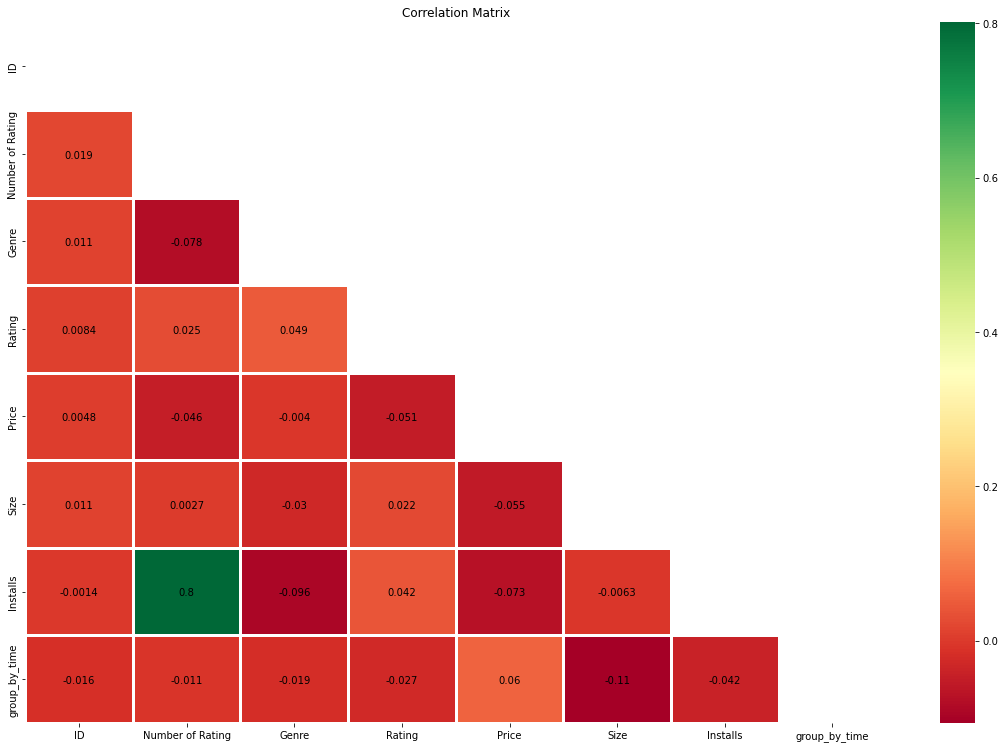

In [29]:
# Correlation Matrix

plt.rcParams["figure.figsize"] = [15.50, 10.50]
plt.rcParams["figure.autolayout"] = True

corr= dataset.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,cmap="RdYlGn", annot = True, annot_kws={"size": 10, "va": "center_baseline", "color": "black"},mask = mask,linewidth=3)
plt.title('Correlation Matrix')

#### * **Installs and number of rating is highly corelated.**

Text(0.5, 1.0, 'Histogram of Intalls')

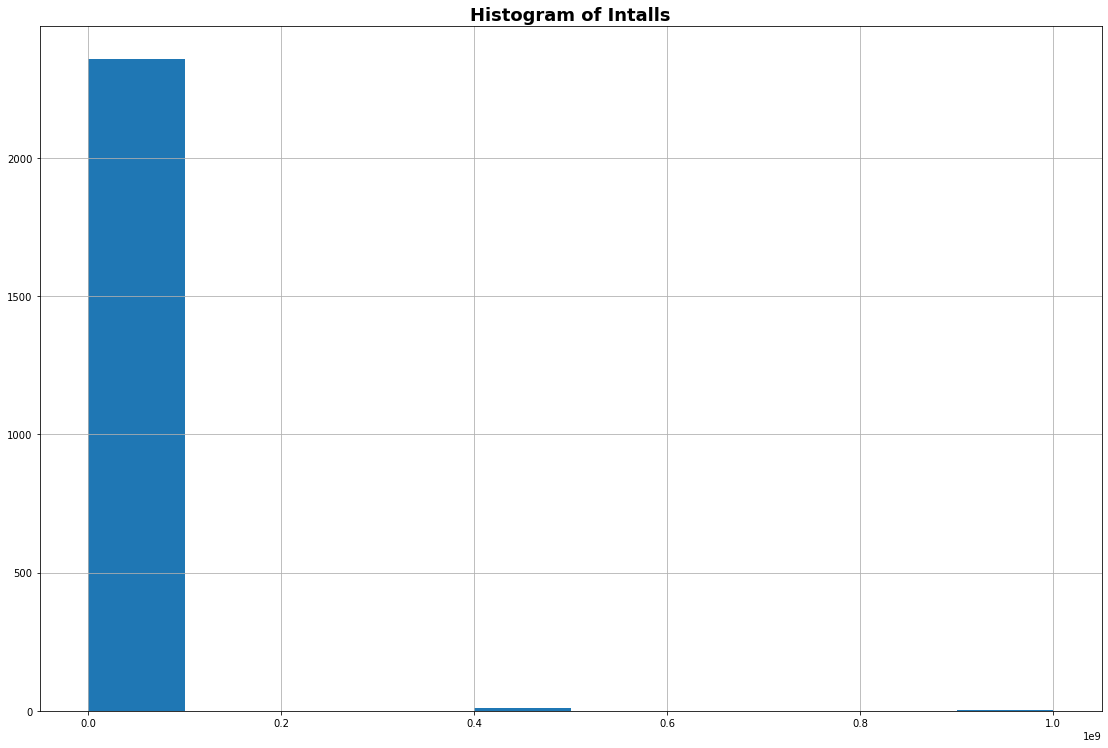

In [46]:
dataset_new['Installs'].hist()
plt.title('Histogram of Intalls', fontsize = 18, fontweight= 'bold')

Text(0.5, 1.0, 'Histogram of Price')

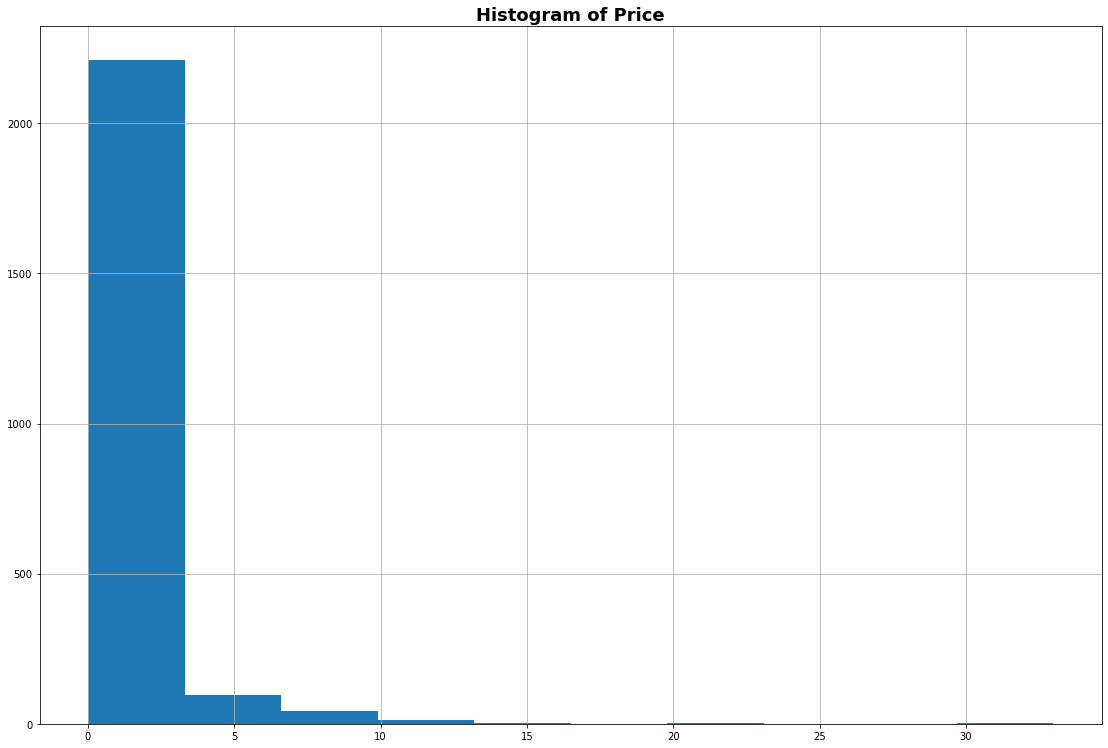

In [47]:
dataset_new['Price'].hist()
plt.title('Histogram of Price', fontsize = 18, fontweight= 'bold')

### Building Regression Model

In [32]:
dataset = dataset.drop(['Content Rating', 'In-app Products', 'Current Version', 'Updated','Description','Name','ID','Offered By', 'Interactive Elements'],axis=1)


In [33]:
dataset

,Number of Rating,Genre,Rating,Price,Size,Installs,Requires Android,group_by_time
0,7227039.0,0.0,4.4,0.00,58.0,100000000.0,4.0,4
1,621784.0,1.0,4.6,0.00,92.0,10000000.0,4.4,4
2,309.0,2.0,3.0,3.99,40.0,10000.0,4.4,4
3,29305.0,3.0,4.5,0.00,80.0,500000.0,7.0,4
4,6613.0,2.0,4.3,0.00,148.0,500000.0,4.4,1
...,...,...,...,...,...,...,...,...
2364,239709.0,1.0,4.5,0.00,79.0,10000000.0,5.0,4
2365,36013.0,2.0,3.8,0.00,74.0,10000000.0,5.0,4
2366,17991.0,4.0,4.0,0.00,144.0,500000.0,5.0,5
2367,67485.0,12.0,4.7,0.00,87.0,1000000.0,4.4,4


In [34]:
X = dataset[['Number of Rating','Genre','Price','Size','Installs','group_by_time']]
y = dataset.Rating

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
mu = X_train.mean(axis=0)
sigma = X_train.std(axis=0)
X_train = (X_train-mu)/sigma
X_test = (X_test-mu)/sigma

In [36]:
np.shape(X_train)

(1895, 6)

In [52]:
mdl = tf.keras.Sequential()
mdl.add(tf.keras.layers.Dense(128,activation='relu',input_shape=(6,)))
mdl.add(tf.keras.layers.Dense(64,activation= 'relu'))
mdl.add(tf.keras.layers.Dense(32,activation= 'relu'))
mdl.add(tf.keras.layers.Dense(1,activation = 'linear'))

mdl.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               896       
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,265
Trainable params: 11,265
Non-trainable params: 0
_________________________________________________________________


In [53]:
mdl.compile(optimizer= 'adam',loss='mse',metrics = ['mape'])
mdl.fit(X_train,y_train,epochs=400)

Epoch 1/400
60/60 [==============================] - 0s 1ms/step - loss: 7.0402 - mape: 50.2001
Epoch 2/400
60/60 [==============================] - 0s 1ms/step - loss: 0.8732 - mape: 16.5935
Epoch 3/400
60/60 [==============================] - 0s 1ms/step - loss: 0.5346 - mape: 12.7530
Epoch 4/400
60/60 [==============================] - 0s 1ms/step - loss: 0.3426 - mape: 10.3286
Epoch 5/400
60/60 [==============================] - 0s 1ms/step - loss: 0.2631 - mape: 8.8809
Epoch 6/400
60/60 [==============================] - 0s 1ms/step - loss: 0.1912 - mape: 7.5422
Epoch 7/400
60/60 [==============================] - 0s 1ms/step - loss: 0.1706 - mape: 7.0544
Epoch 8/400
60/60 [==============================] - 0s 1ms/step - loss: 0.1304 - mape: 6.4383
Epoch 9/400
60/60 [==============================] - 0s 1ms/step - loss: 0.1091 - mape: 5.9890
Epoch 10/400
60/60 [==============================] - 0s 1ms/step - loss: 0.1034 - mape: 5.9085
Epoch 11/400
60/60 [=========================

60/60 [==============================] - 0s 1ms/step - loss: 0.0762 - mape: 4.9881
Epoch 171/400
60/60 [==============================] - 0s 1ms/step - loss: 0.0741 - mape: 4.9692
Epoch 172/400
60/60 [==============================] - 0s 1ms/step - loss: 0.0771 - mape: 5.0464
Epoch 173/400
60/60 [==============================] - 0s 1ms/step - loss: 0.0754 - mape: 5.0061
Epoch 174/400
60/60 [==============================] - 0s 1ms/step - loss: 0.0778 - mape: 5.0881
Epoch 175/400
60/60 [==============================] - 0s 1ms/step - loss: 0.0778 - mape: 5.0866
Epoch 176/400
60/60 [==============================] - 0s 1ms/step - loss: 0.0755 - mape: 4.9494
Epoch 177/400
60/60 [==============================] - 0s 1ms/step - loss: 0.0750 - mape: 4.9715
Epoch 178/400
60/60 [==============================] - 0s 1ms/step - loss: 0.0784 - mape: 5.0825
Epoch 179/400
60/60 [==============================] - 0s 1ms/step - loss: 0.0744 - mape: 4.9129
Epoch 180/400
60/60 [=======================

60/60 [==============================] - 0s 2ms/step - loss: 0.0702 - mape: 4.7891
Epoch 339/400
60/60 [==============================] - 0s 1ms/step - loss: 0.0667 - mape: 4.6116
Epoch 340/400
60/60 [==============================] - 0s 1ms/step - loss: 0.0652 - mape: 4.5575
Epoch 341/400
60/60 [==============================] - 0s 1ms/step - loss: 0.0657 - mape: 4.6103
Epoch 342/400
60/60 [==============================] - 0s 1ms/step - loss: 0.0665 - mape: 4.6197
Epoch 343/400
60/60 [==============================] - 0s 1ms/step - loss: 0.0660 - mape: 4.6210
Epoch 344/400
60/60 [==============================] - 0s 1ms/step - loss: 0.0657 - mape: 4.6445
Epoch 345/400
60/60 [==============================] - 0s 1ms/step - loss: 0.0669 - mape: 4.6613
Epoch 346/400
60/60 [==============================] - 0s 1ms/step - loss: 0.0663 - mape: 4.6440
Epoch 347/400
60/60 [==============================] - 0s 1ms/step - loss: 0.0656 - mape: 4.5903
Epoch 348/400
60/60 [=======================

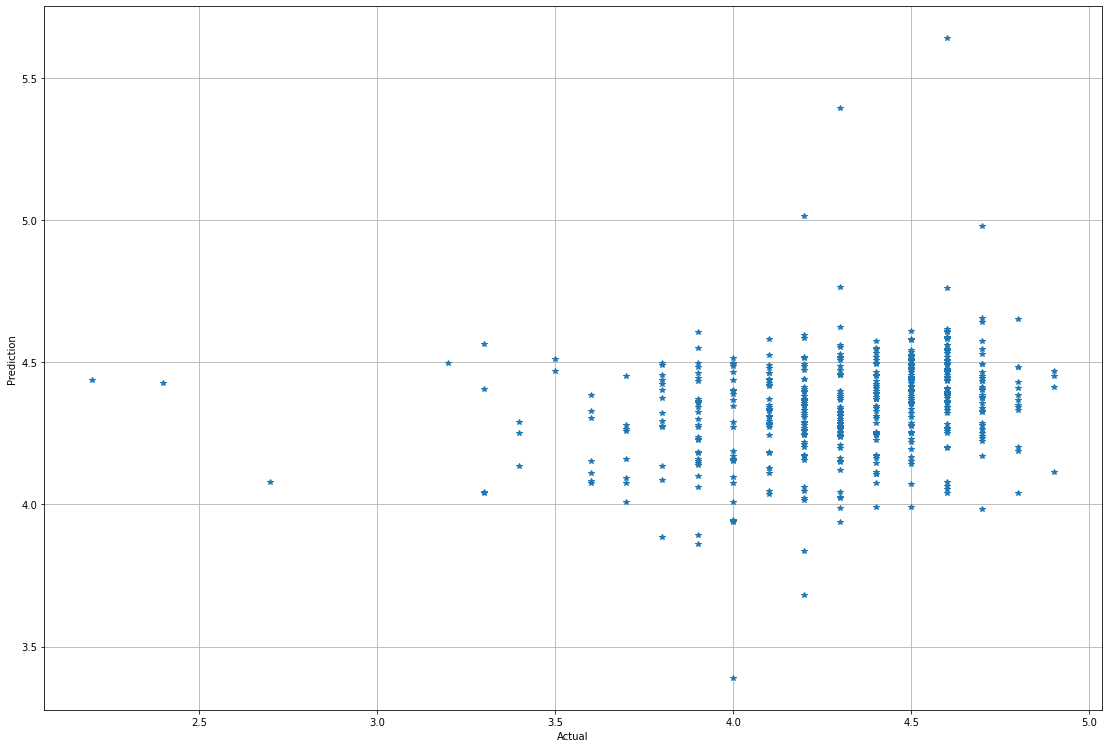

In [54]:
ypred= mdl.predict(X_test)
plt.plot(y_test,ypred,"*")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.grid()

In [55]:
print("Training data")
print(mdl.evaluate(X_train,y_train))
print("Testing data")
print(mdl.evaluate(X_test,y_test))

Training data
60/60 [==============================] - 0s 997us/step - loss: 0.0572 - mape: 4.2084
[0.05718908831477165, 4.208398342132568]
Testing data
15/15 [==============================] - 0s 998us/step - loss: 0.1283 - mape: 6.3176
[0.12826137244701385, 6.317584037780762]


In [56]:
error = []
for i in range (len(ypred)):
    error.append(abs(ypred[i] -y_test.values[i])/ y_test.values[i]*100)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

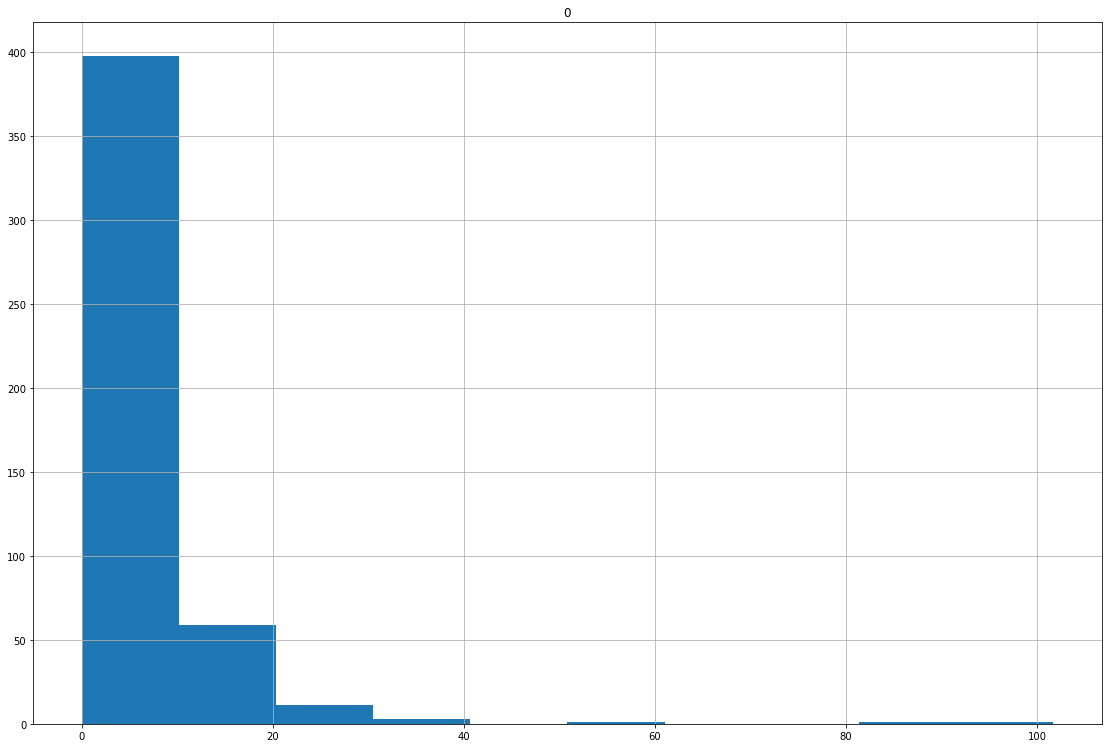

In [57]:
pd.DataFrame(error).hist() # rating is estimated with 10 percent error averages.